In [5]:
# new packages shapely.geometry import Polygon
# the only new feature is the creation of Point and Polygon objects for folium to get street-level fatality information
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [3]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

In [3]:
from collections import Counter

In [4]:
import random

In [5]:
import math

In [6]:
import geopy.distance

ModuleNotFoundError: No module named 'geopy'

In [7]:
import sys
#sys.path.append('missingno')

In [8]:
#import missingno as msno

In [9]:
# plotting packages
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [10]:
import geopandas as gpd
from shapely.geometry import Polygon, Point

ModuleNotFoundError: No module named 'geopandas'

In [11]:
import folium

ModuleNotFoundError: No module named 'folium'

In [12]:
import re

In [13]:
# set so all columns are displayed
pd.set_option('display.max_columns',None)

In [14]:
def create_color_palette_and_legend(color_palette,intervals):
    color_dict={}
    for i in range(len(color_palette)):
        color_dict[intervals[i]]=color_palette[i]
    color_legend=[Line2D([0], [0], marker="s",linestyle="none",markersize=15,color=color) for color in color_dict.values()]
    return color_dict,color_legend

In [15]:
def ratio_to_color(color_dict,ratio):
    for interval in color_dict.keys():
        if len(re.findall(',',interval)) == 0:
            right=float(interval[1:len(interval)-1])
            right_flag=False
        else:
            right=interval[1:len(interval)-1].split(",")[1]
            right_flag=True
        if (ratio < float(right) and right_flag) or (ratio <= float(right) and not right_flag):
            return color_dict[interval]
    return color_dict[interval]

In [16]:
chicago_blue_palette=['#f7fcfe','#e8f5fb','#d9eef9','#cae7f6','#b3ddf2','#a1c7da','#7d9ba9','#5a6f79','#364249','#121618']

In [17]:
unit_intervals=['[0.0,0.1)','[0.1,0.2)','[0.2,0.3)', '[0.3,0.4)','[0.4,0.5)','[0.5,0.6)','[0.6,0.7)','[0.7,0.8)','[0.8,0.9)', '[0.9,1.0]']

In [18]:
blue_color_dict,blue_color_legend=create_color_palette_and_legend(chicago_blue_palette,unit_intervals)

In [19]:
WB_TRAFFIC=pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/Chicago Traffic Violations.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/Chicago Traffic Violations.csv'

In [ ]:
print(WB_TRAFFIC.shape)
display(WB_TRAFFIC.head(n=15))
print(WB_TRAFFIC.info())

In [20]:
# columns with missing data
print(WB_TRAFFIC.isnull().sum())

NameError: name 'WB_TRAFFIC' is not defined

In [21]:
# look at columns for missing values
#msno.matrix(WB_TRAFFIC,width_ratios=(2,1),sparkline=False)

In [22]:
x=list(WB_TRAFFIC['LIGHTING_CONDITION'])
c=Counter(x)
plt.bar(c.keys(),c.values())
plt.xticks(rotation=60,ha='right')
plt.title("Crashes vs Lighting")
plt.show()

NameError: name 'WB_TRAFFIC' is not defined

In [23]:
x=list(WB_TRAFFIC['TRAFFICWAY_TYPE'])
c=Counter(x)
plt.bar(c.keys(),c.values())
plt.xticks(rotation=60,ha='right')
plt.title("Crashes vs Traffic Flow")
plt.show()

NameError: name 'WB_TRAFFIC' is not defined

In [24]:
x=list(WB_TRAFFIC['CRASH_HOUR'])
c=Counter(x)
plt.bar(c.keys(),c.values())
plt.xlabel("Hour")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=60,ha='right')
plt.title("When do most crashes occur?")
plt.show()

NameError: name 'WB_TRAFFIC' is not defined

In [25]:
rows=list(WB_TRAFFIC[WB_TRAFFIC[['INJURIES_FATAL']].isnull().any(axis=1)].index)
WB_FTMP=WB_TRAFFIC.drop(index=rows)
WB_FTMP.reset_index(drop=True,inplace=True)
print(list(WB_FTMP['INJURIES_FATAL'].unique()))
WB_FTL=WB_FTMP[WB_FTMP['INJURIES_FATAL'] > 0.0]
rows=list(WB_FTL[WB_FTL[['LATITUDE','LONGITUDE']].isnull().any(axis=1)].index)
WB_FTL=WB_FTL.drop(index=rows)
WB_FTL.reset_index(drop=True,inplace=True)
print(WB_FTL.shape)

NameError: name 'WB_TRAFFIC' is not defined

In [26]:
# create dataframe with fatalities
WB_FATAL=WB_TRAFFIC[WB_TRAFFIC['MOST_SEVERE_INJURY'].isin(['FATAL'])]
WB_FATAL.reset_index(inplace=True)
print(WB_FATAL.shape)
print(WB_FATAL.isnull().sum())
# drop fatalities with no location data
rows=list(WB_FATAL[WB_FATAL[['LATITUDE','LONGITUDE']].isna().any(axis=1)].index)
print("Number of fatalities dropped = ",len(rows))
WB_FATAL=WB_FATAL.drop(index=rows)
WB_FATAL.reset_index(drop=True,inplace=True)

NameError: name 'WB_TRAFFIC' is not defined

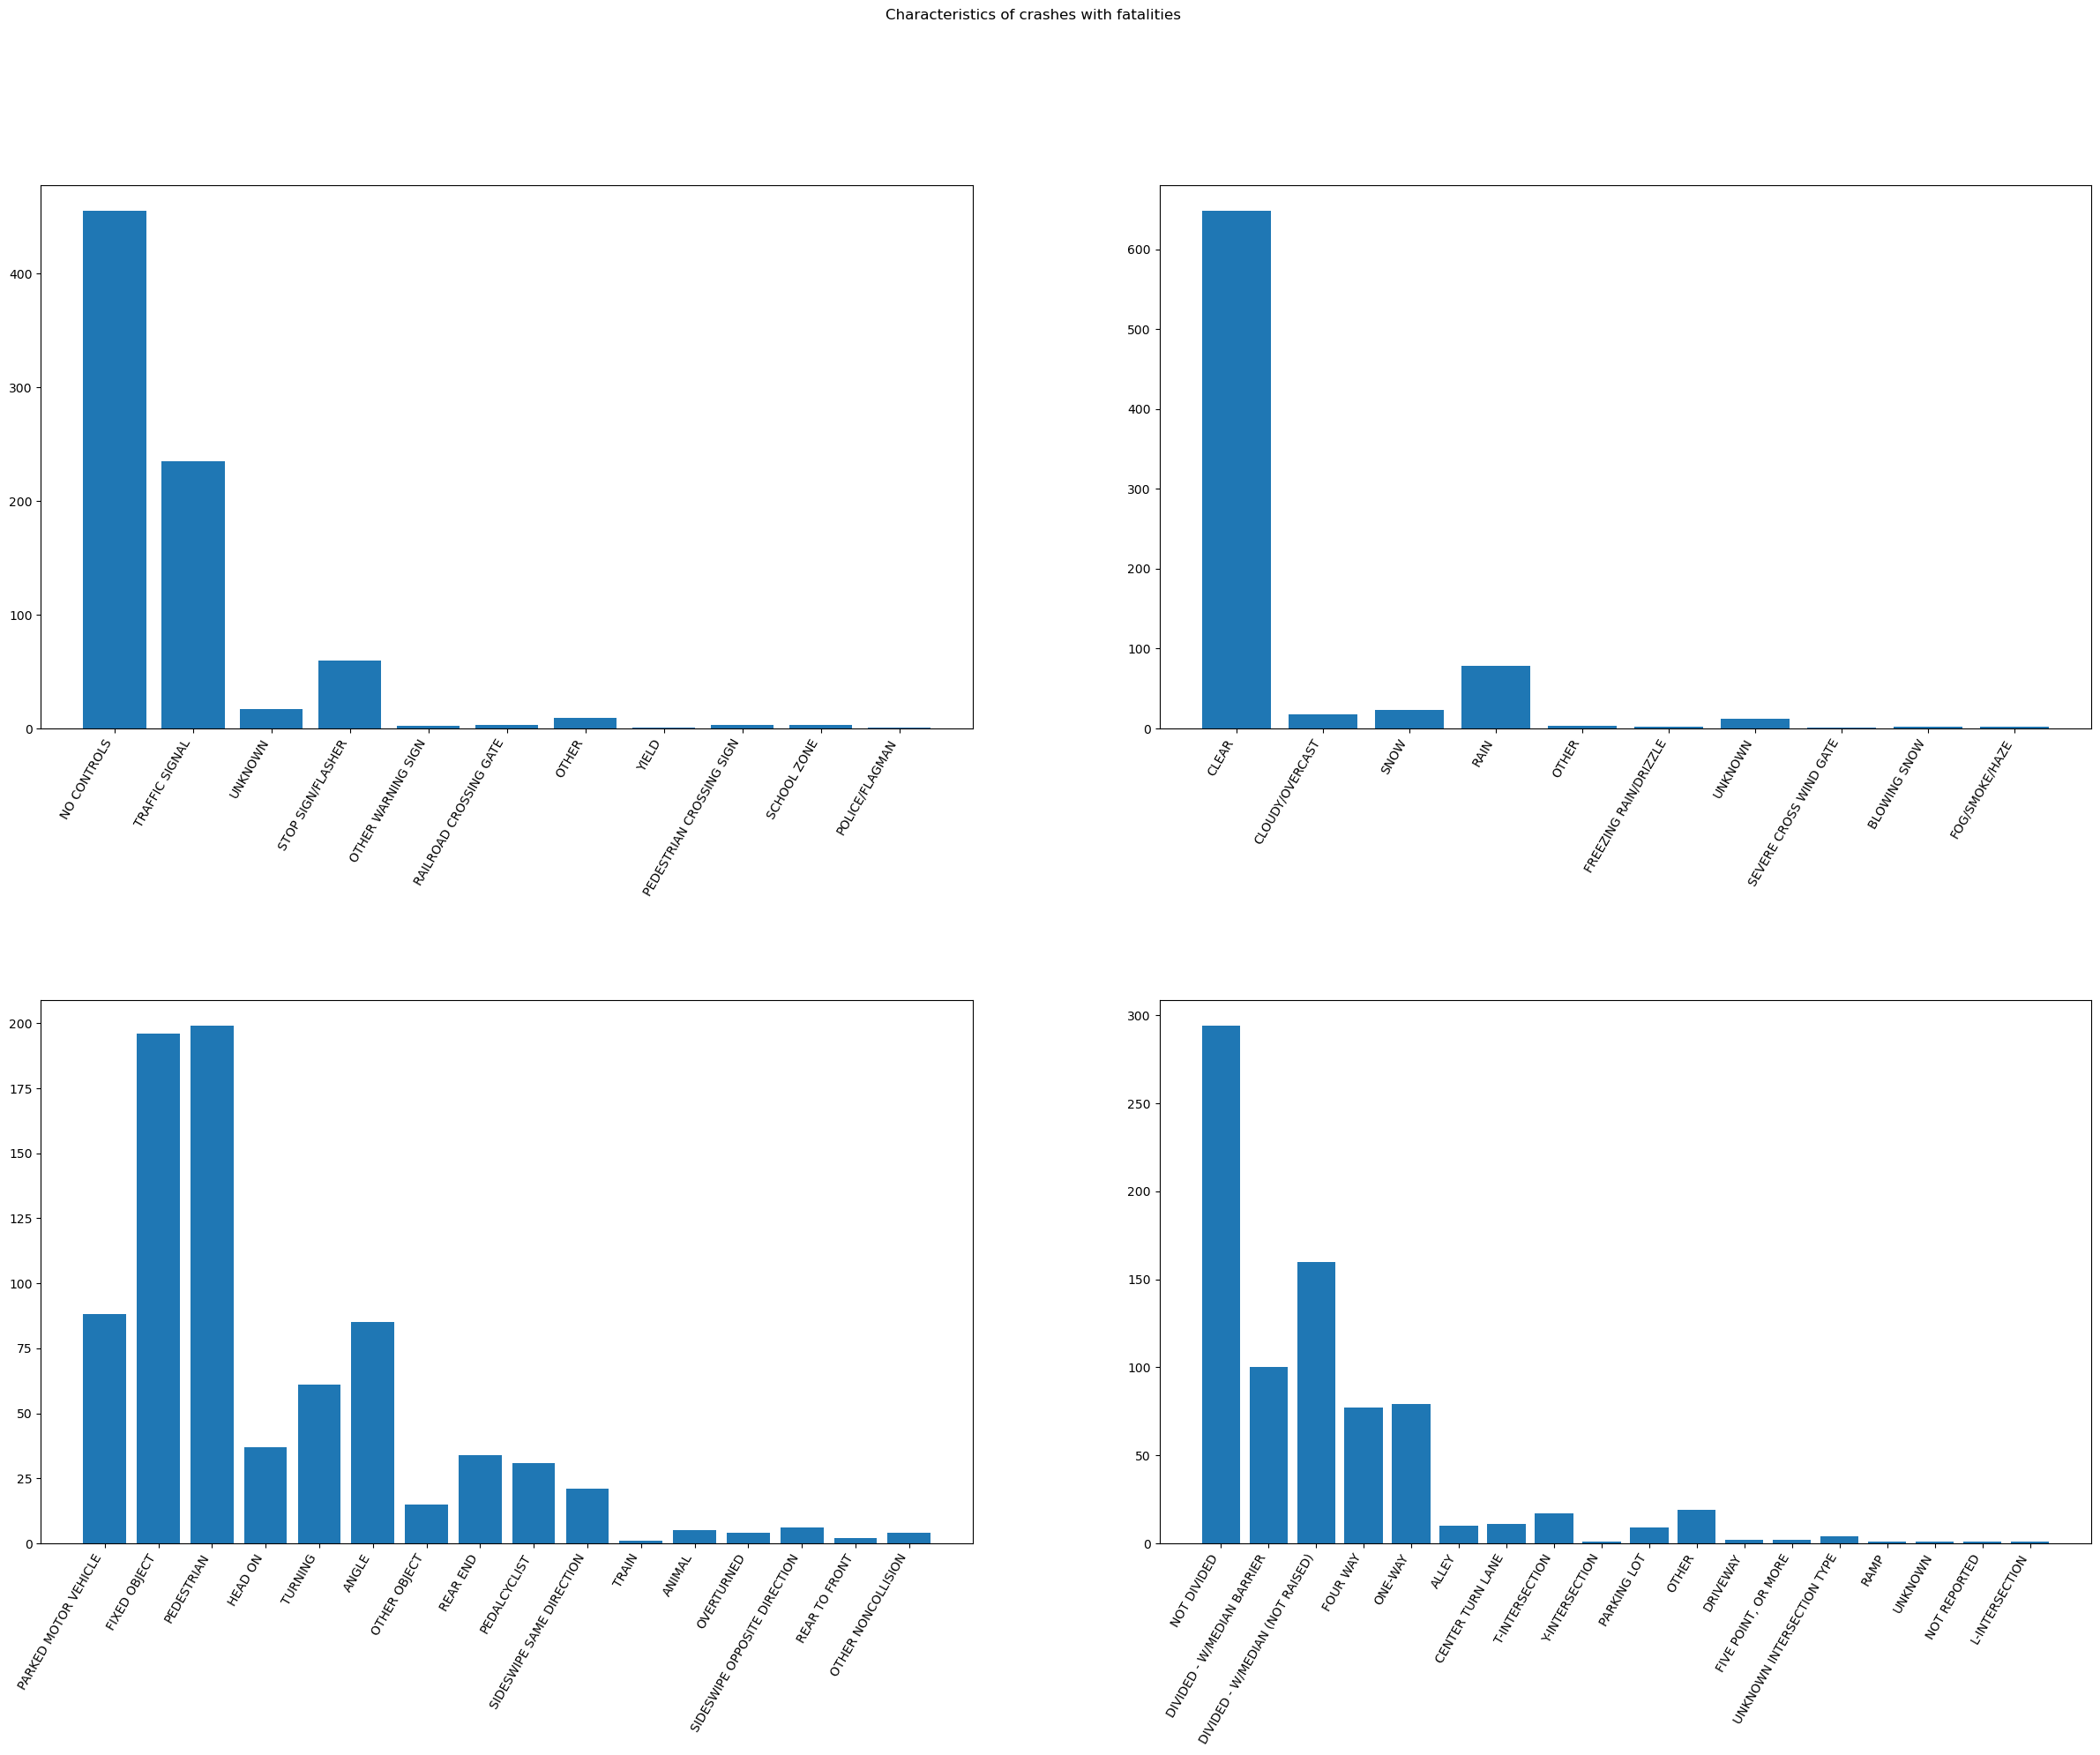

In [29]:
# check fatalities against four conditions, presence of traffic control devices, lighting conditions, weather conditions, traffic way type
x1=list(WB_FATAL['TRAFFIC_CONTROL_DEVICE'])
c1=Counter(x1)
x2=list(WB_FATAL['WEATHER_CONDITION'])
c2=Counter(x2)
x3=list(WB_FATAL['FIRST_CRASH_TYPE'])
c3=Counter(x3)
x4=list(WB_FATAL['TRAFFICWAY_TYPE'])
c4=Counter(x4)
fig,axs=plt.subplots(2,2,figsize=(30,20))
axs[0,0].bar(c1.keys(),c1.values())
axs[0,0].set_xticks(range(len(c1.keys())),c1.keys(),rotation=60,ha='right')
axs[0,1].bar(c2.keys(),c2.values())
axs[0,1].set_xticks(range(len(c2.keys())),c2.keys(),rotation=60,ha='right')
axs[1,0].bar(c3.keys(),c3.values())
axs[1,0].set_xticks(range(len(c3.keys())),c3.keys(),rotation=60,ha='right')
axs[1,1].bar(c4.keys(),c4.values())
axs[1,1].set_xticks(range(len(c4.keys())),c4.keys(),rotation=60,ha='right')
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Characteristics of crashes with fatalities")
plt.show()

(56338, 53)

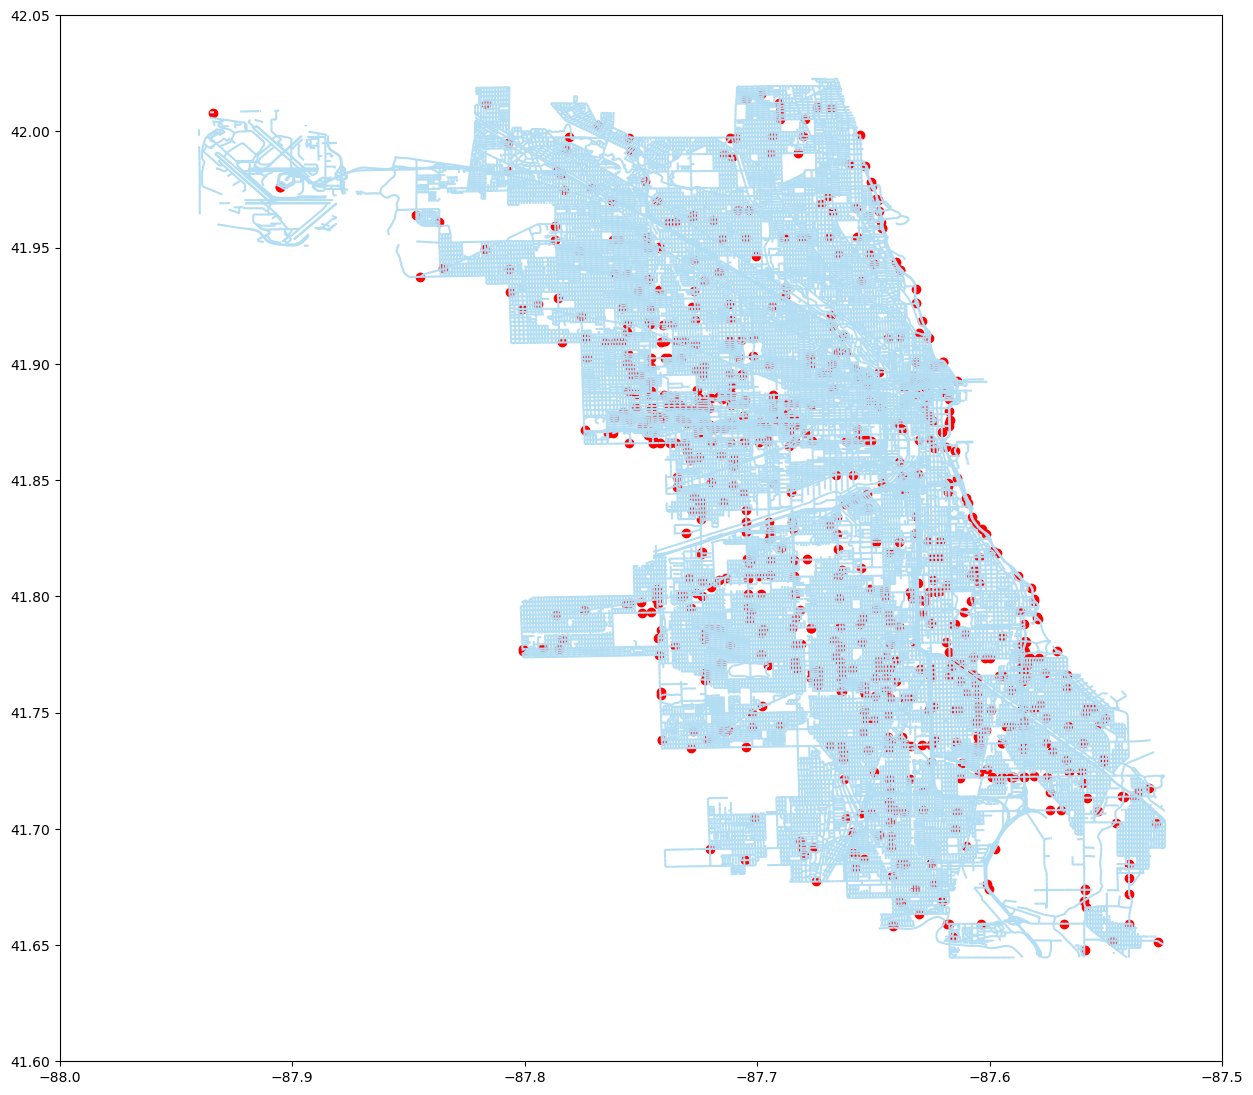

In [30]:
# compare fatalities with streets to see where they occur
# load shapefile for city streets Chicago, .shx file needed as well
chicago_street_map=gpd.read_file(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/chicago_streets.shp')
display(chicago_street_map.shape)
Lat=list(WB_FATAL['LATITUDE'])
Long=list(WB_FATAL['LONGITUDE'])
WB_FTL=pd.DataFrame({'Latitude':Lat,'Longitude':Long})
GEO=gpd.GeoDataFrame(WB_FTL,geometry=gpd.points_from_xy(WB_FTL.Longitude,WB_FTL.Latitude))
fig,ax=plt.subplots(figsize=(15,18))
xlim=([-88,-87.5])
ylim=([41.6,42.05])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
chicago_street_map.plot(ax=ax,color='#b3ddf2')
GEO.plot(ax=ax,color='#ff0000')
plt.show()

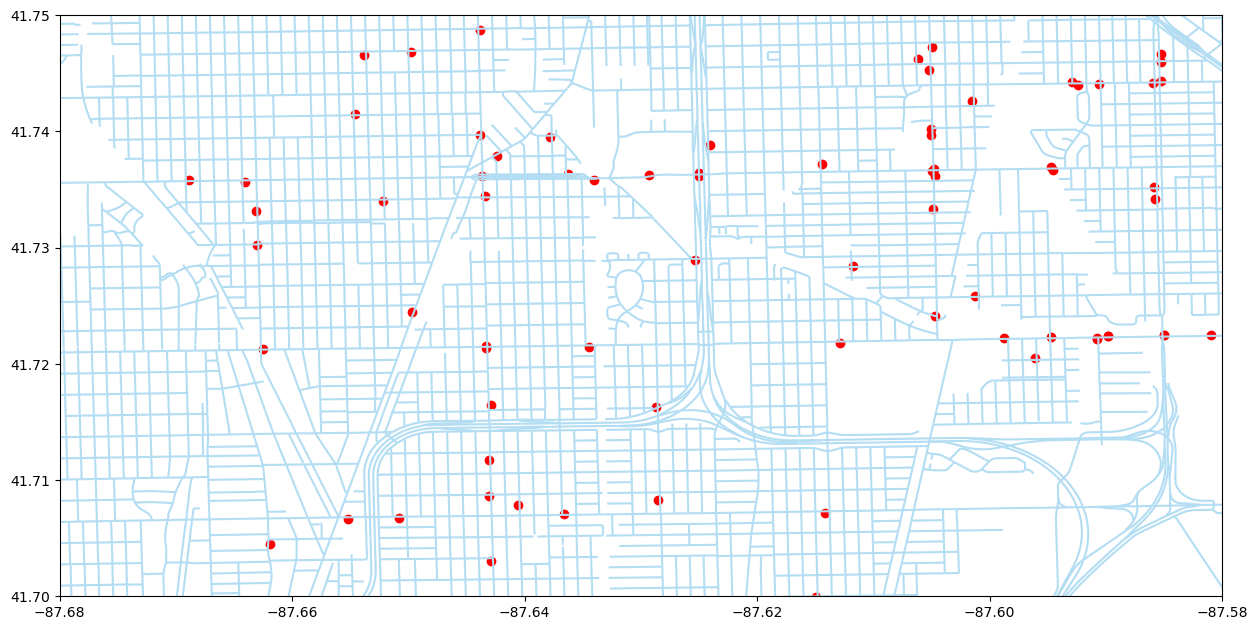

In [31]:
# zoom in E 95th Street horizontal street with fatalities
chicago_street_map=gpd.read_file(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/chicago_streets.shp')
Lat=list(WB_FATAL['LATITUDE'])
Long=list(WB_FATAL['LONGITUDE'])
WB_FTL=pd.DataFrame({'Latitude':Lat,'Longitude':Long})
GEO=gpd.GeoDataFrame(WB_FTL,geometry=gpd.points_from_xy(WB_FTL.Longitude,WB_FTL.Latitude))
fig,ax=plt.subplots(figsize=(15,18))
xlim=([-87.68,-87.58])
ylim=([41.7,41.75])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
chicago_street_map.plot(ax=ax,color='#b3ddf2')
GEO.plot(ax=ax,color='#ff0000')
plt.show()

In [32]:
# compare fatalities with streets to see where they occur
# load shapefile for city streets Chicago, .shx file needed as well
chicago_neighborhoods=gpd.read_file(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/chicago_neighborhoods.shp')
display(chicago_neighborhoods.shape)
display(chicago_neighborhoods.head(n=2))
locations=[]
latitudes=[]
longitudes=[]
for indx,row in chicago_neighborhoods.iterrows():
    center=str(row['geometry'].centroid)
    point=center[7:len(center)-1].split(" ")
    coord=(float(point[0]),float(point[1]))
    locations.append(coord)
    latitudes.append(float(point[1]))
    longitudes.append(float(point[0]))
chicago_neighborhoods['centroid']=locations
chicago_neighborhoods['latitude']=latitudes
chicago_neighborhoods['longitude']=longitudes
chicago_neighborhoods.sort_values(by=['latitude','longitude'],ascending=True,inplace=True)
chicago_neighborhoods.reset_index(drop=True,inplace=True)
display(chicago_neighborhoods.head(n=5))

(98, 5)

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((-87.62761 41.87437, -87.62760 41.873..."


,pri_neigh,sec_neigh,shape_area,shape_len,geometry,centroid,latitude,longitude
0,Riverdale,RIVERDALE,9.838950e+07,46455.440857,"POLYGON ((-87.60157 41.68621, -87.60158 41.686...","(-87.60284873293824, 41.660137470713465)",41.660137,-87.602849
1,Hegewisch,SOUTHEAST SIDE,1.459657e+08,73692.382132,"POLYGON ((-87.52462 41.69180, -87.52465 41.688...","(-87.54657542638772, 41.660534905539336)",41.660535,-87.546575
2,West Pullman,WEST PULLMAN,9.936520e+07,50023.843001,"POLYGON ((-87.61828 41.65911, -87.61829 41.659...","(-87.63574016611989, 41.673820051191385)",41.673820,-87.635740
3,Morgan Park,"MOUNT GREENWOOD,MORGAN PARK",9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...","(-87.66905398717743, 41.6897295867001)",41.689730,-87.669054
4,South Deering,SOUTHEAST SIDE,3.037971e+08,80389.871800,"POLYGON ((-87.54568 41.72282, -87.54559 41.722...","(-87.57005674803642, 41.690637013156014)",41.690637,-87.570057


In [33]:
n_labels=70
dn=(42.05-41.6)/n_labels
print(dn)

0.006428571428571368


In [34]:
# compare fatalities with streets to see where they occur
# load shapefile for city streets Chicago, .shx file needed as well
chicago_ward_map=gpd.read_file(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/chicago_wards.shp')
display(chicago_ward_map.shape)
display(chicago_ward_map.head(n=2))

(50, 4)

,shape_area,shape_leng,ward,geometry
0,1.160965e+08,93073.340838,12,"POLYGON ((-87.69623 41.85755, -87.69625 41.857..."
1,1.031436e+08,97901.323833,16,"POLYGON ((-87.66289 41.79884, -87.66289 41.798..."


<function matplotlib.pyplot.show(close=None, block=None)>

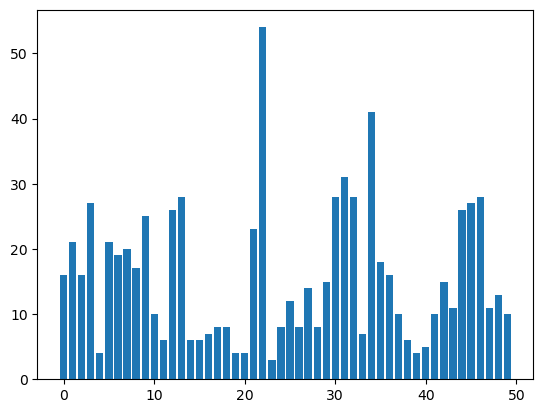

In [35]:
ward_fatalities={}
for indx,row in WB_FATAL.iterrows():
    pt=Point(row['LONGITUDE'],row['LATITUDE'])
    for inx,rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            if inx not in ward_fatalities.keys():
                ward_fatalities[inx]=1
            else:
                ward_fatalities[inx]=ward_fatalities[inx]+1
            break
plt.bar(list(ward_fatalities.keys()),list(ward_fatalities.values()))
plt.show

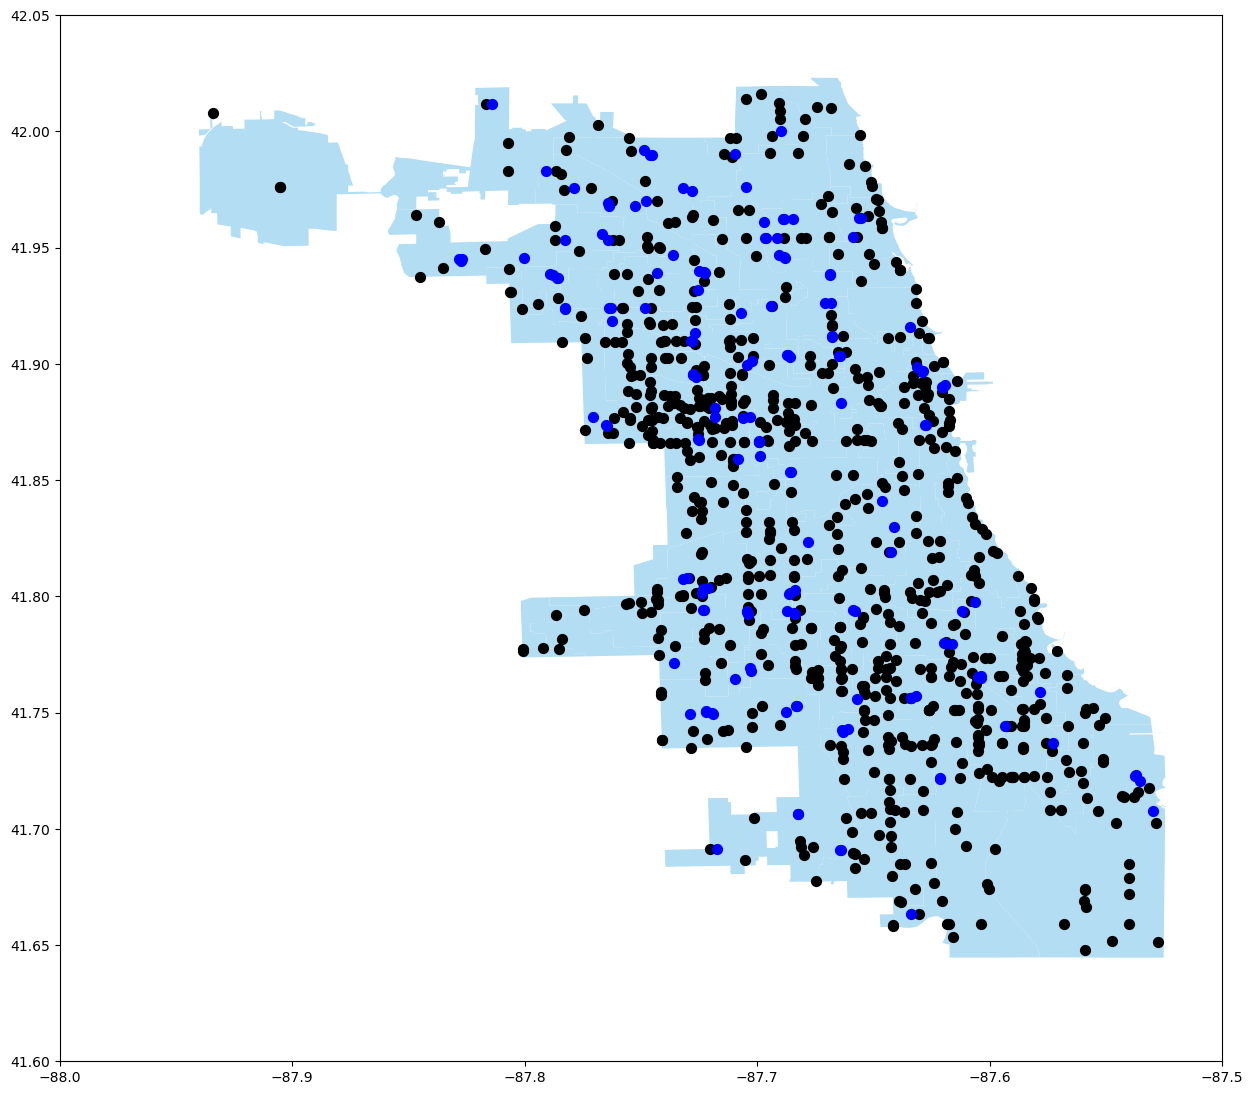

In [43]:
# Assuming WB_FATAL contains the fatalities data
Lat = list(WB_FATAL['LATITUDE'])
Long = list(WB_FATAL['LONGITUDE'])
WB_FTL = pd.DataFrame({'Latitude': Lat, 'Longitude': Long})
GEO = gpd.GeoDataFrame(WB_FTL, geometry=gpd.points_from_xy(WB_FTL.Longitude, WB_FTL.Latitude))

fig, ax = plt.subplots(figsize=(15, 18))
xlim = ([-88, -87.5])
ylim = ([41.6, 42.05])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
chicago_ward_map.plot(ax=ax, color='#b3ddf2')

# Plotting the fatalities
GEO.plot(ax=ax, color='black', markersize=50)

# Load speed camera locations data
speed_camera_data = pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/DMap_-_Speed_Camera_Locations.csv')

# Converting to a GeoDataFrame
speed_camera_geo = gpd.GeoDataFrame(speed_camera_data, geometry=gpd.points_from_xy(speed_camera_data.LONGITUDE, speed_camera_data.LATITUDE))

# Plotting speed cameras on the map
speed_camera_geo.plot(ax=ax, color='blue', markersize=50)

plt.show()


In [37]:
#ADDS A LATITUDE AND LONGITUDE COLUMN TO RED LIGHT DATA 
df = pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/red_lights_0.1.csv')
#camera_data = pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/Red_Light_Camera_Locations.csv')


# Extract latitude and longitude using string manipulation
df['LONGITUDE'] = df['geometry'].str.extract('(-?\d+\.\d+)').astype(float)
df['LATITUDE'] = df['geometry'].str.extract('(-?\d+\.\d+) (\-?\d+\.\d+)')[1].astype(float)

# Drop the original geometry column (optional)
#df.drop(columns=['geometry'], inplace=True)

# Save the updated DataFrame back to a new CSV
df.to_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/red_lights_0.1.csv', index=False)

In [38]:
import geopandas as gpd
from shapely.geometry import Point

# Read the red lights data after processing latitude and longitude
df_lights = pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/red_lights_0.1.csv')

# Convert the DataFrame to a GeoDataFrame
lights_gdf = gpd.GeoDataFrame(df_lights, 
                              geometry=gpd.points_from_xy(df_lights.LONGITUDE, df_lights.LATITUDE))
# Use the 'WB_FATAL' DataFrame directly for fatalities 
fatalities_gdf = gpd.GeoDataFrame(WB_FATAL, 
                                  geometry=gpd.points_from_xy(WB_FATAL.LONGITUDE, WB_FATAL.LATITUDE))

# Assuming 90 meters for now, but you can adjust this value
buffered_fatalities = fatalities_gdf.buffer(0.00021)  # Adjust this value for the buffer size

# 2. Perform a spatial join
overlaps = gpd.sjoin(lights_gdf, gpd.GeoDataFrame(geometry=buffered_fatalities), how="inner", op="intersects")

# 3. Count the number of matches
overlap_count = overlaps.shape[0]

print(f"Number of Red Lights: {len(lights_gdf)}")
print(f"Number of Fatalities: {len(fatalities_gdf)}")
print(f"Number of Overlaps: {overlap_count}")
print(f"percent fatalities overlapping with red lights: {overlap_count * 100 / len(fatalities_gdf)}")

Number of Red Lights: 7016
Number of Fatalities: 789
Number of Overlaps: 157
percent fatalities overlapping with red lights: 19.898605830164765


/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [39]:
import geopandas as gpd
from shapely.geometry import Point

# Load Chicago boundary from shapefile
chicago_boundary_gdf = gpd.read_file(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/Boundaries - City (2).zip')

# Read the red lights data after processing latitude and longitude
df_lights = pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/red_lights_0.1.csv')
lights_gdf = gpd.GeoDataFrame(df_lights, 
                              geometry=gpd.points_from_xy(df_lights.LONGITUDE, df_lights.LATITUDE))

# Filter red lights to only those within Chicago boundary
lights_gdf = lights_gdf[lights_gdf.geometry.within(chicago_boundary_gdf.iloc[0].geometry)]

# Use the 'WB_FATAL' DataFrame directly for fatalities 
fatalities_gdf = gpd.GeoDataFrame(WB_FATAL, 
                                  geometry=gpd.points_from_xy(WB_FATAL.LONGITUDE, WB_FATAL.LATITUDE))

# Assuming 90 meters for now, but you can adjust this value
buffered_fatalities = fatalities_gdf.buffer(0.00021)  # Adjust this value for the buffer size

# Perform a spatial join
overlaps = gpd.sjoin(lights_gdf, gpd.GeoDataFrame(geometry=buffered_fatalities), how="inner", op="intersects")

# Count the number of matches
overlap_count = overlaps.shape[0]

print(f"Total Number of Red Lights in Chicago: {len(lights_gdf)}")
print(f"Total Number of Fatalities in Chicago: {len(fatalities_gdf)}")
print(f"Number of Fatalities that Occured within 21 meters of a Red Light in Chicago: {overlap_count}")
print(f"Percent of Red Lights where a Fatality Occured: {overlap_count * 100 / len(lights_gdf):.2f}%")

Total Number of Red Lights in Chicago: 2602
Total Number of Fatalities in Chicago: 789
Number of Fatalities that Occured within 21 meters of a Red Light in Chicago: 153
Percent of Red Lights where a Fatality Occured: 5.88%


/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [40]:
import geopandas as gpd
from shapely.geometry import Point

# Read the red light cameras data
camera_data = pd.read_csv(r'/users/rmukherji/Documents/Intro_Data_Science/Chicago_Traffic/Red_Light_Camera_Locations.csv')

# Convert the camera_data DataFrame to a GeoDataFrame
cameras_gdf = gpd.GeoDataFrame(camera_data, 
                               geometry=gpd.points_from_xy(camera_data.LONGITUDE, camera_data.LATITUDE))

# Use the 'WB_FATAL' DataFrame
fatalities_gdf = gpd.GeoDataFrame(WB_FATAL, 
                                  geometry=gpd.points_from_xy(WB_FATAL.LONGITUDE, WB_FATAL.LATITUDE))

# Assuming 90 meters
buffered_fatalities = fatalities_gdf.buffer(0.00021)  # Adjust this value for the buffer size

# Perform a spatial join
overlaps_cameras = gpd.sjoin(cameras_gdf, gpd.GeoDataFrame(geometry=buffered_fatalities), how="inner", op="intersects")

# Count the number of matches
overlap_count_cameras = overlaps_cameras.shape[0]

print(f"Total Number of Red Lights with Cameras in Chicago: {len(cameras_gdf)}")
print(f"Total Number of Fatalities in Chicago: {len(fatalities_gdf)}")
print(f"Number of Fatalities that occured within 21 meters of a Red Light with Cameras: {overlap_count_cameras}")
print(f"Percent of Red Lights with Cameras where a Fatality Occured: {overlap_count_cameras * 100 / len(cameras_gdf):.2f}%")

Total Number of Red Lights with Cameras in Chicago: 149
Total Number of Fatalities in Chicago: 789
Number of Fatalities that occured within 21 meters of a Red Light with Cameras: 24
Percent of Red Lights with Cameras where a Fatality Occured: 16.11%


/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [41]:
max_ward_fatalities=max(list(ward_fatalities.values()))
color_list=[]
for indx,row in chicago_ward_map.iterrows():
    ratio=ward_fatalities[indx]/max_ward_fatalities
    color_list.append(ratio_to_color(blue_color_dict,ratio))
chicago_ward_map['colors']=color_list



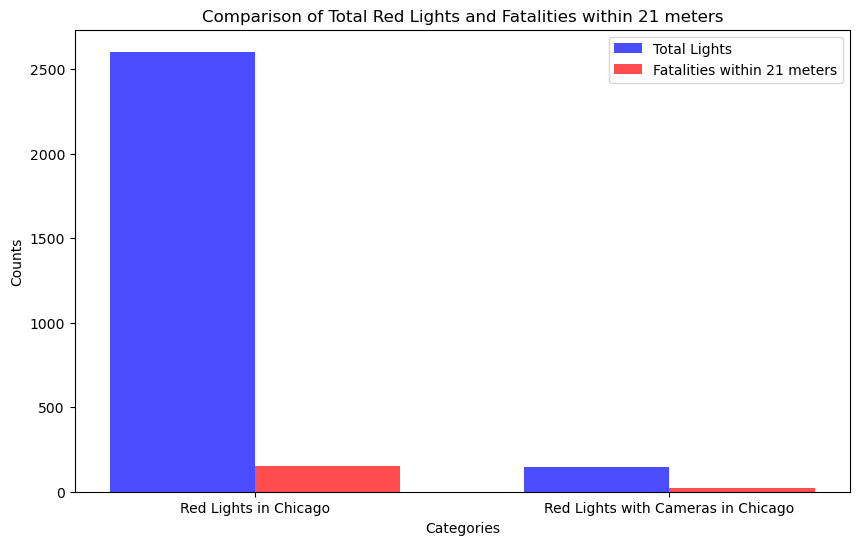

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Red Lights in Chicago', 'Red Lights with Cameras in Chicago']
total_lights = [2602, 149]
fatalities_within_21m = [153, 24]

# Bar width and positions
bar_width = 0.35
index = np.arange(len(categories))

# Create bars
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, total_lights, bar_width, label='Total Lights', color='blue', alpha=0.7)
bar2 = ax.bar(index + bar_width, fatalities_within_21m, bar_width, label='Fatalities within 21 meters', color='red', alpha=0.7)

# Describe the data
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Total Red Lights and Fatalities within 21 meters')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Rotate the x labels for better visibility
plt.xticks(rotation=0)
#ax.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Filter WB_FATAL for rows that are within the vicinity of red light cameras (from your spatial join result)
red_light_camera_crashes = WB_FATAL[WB_FATAL.index.isin(overlaps['index_right'])]

# Filter WB_FATAL for rows that are not within the vicinity of red light cameras
regular_red_light_crashes = WB_FATAL[~WB_FATAL.index.isin(overlaps['index_right'])]

# Count for each crash type for red light camera locations
rlc_angle = len(red_light_camera_crashes[red_light_camera_crashes['FIRST_CRASH_TYPE'] == 'ANGLE'])
rlc_rear_end = len(red_light_camera_crashes[red_light_camera_crashes['FIRST_CRASH_TYPE'] == 'REAR END'])

# Count for each crash type for regular red lights
reg_angle = len(regular_red_light_crashes[regular_red_light_crashes['FIRST_CRASH_TYPE'] == 'ANGLE'])
reg_rear_end = len(regular_red_light_crashes[regular_red_light_crashes['FIRST_CRASH_TYPE'] == 'REAR END'])

# Plot for Red Light Cameras
plt.figure(figsize=(10, 6))
plt.bar(['ANGLE', 'REAR END'], [rlc_angle, rlc_rear_end], color=['red', 'blue'])
plt.title('Number of Crashes at Red Light Cameras')
plt.ylabel('Number of Crashes')
plt.show()

# Plot for Regular Red Lights
plt.figure(figsize=(10, 6))
plt.bar(['ANGLE', 'REAR END'], [reg_angle, reg_rear_end], color=['red', 'blue'])
plt.title('Number of Crashes at Regular Red Lights')
plt.ylabel('Number of Crashes')
plt.show()




In [ ]:
import matplotlib.pyplot as plt

# Get unique crash types
crash_types = WB_FATAL['FIRST_CRASH_TYPE'].unique()

# Filter WB_FATAL for rows that are within the vicinity of red light cameras (from your spatial join result)
red_light_camera_crashes = WB_FATAL[WB_FATAL.index.isin(overlaps['index_right'])]

# Filter WB_FATAL for rows that are not within the vicinity of red light cameras
regular_red_light_crashes = WB_FATAL[~WB_FATAL.index.isin(overlaps['index_right'])]

# Get counts for each crash type for red light camera locations
rlc_counts = red_light_camera_crashes['FIRST_CRASH_TYPE'].value_counts()

# Get counts for each crash type for regular red lights
reg_counts = regular_red_light_crashes['FIRST_CRASH_TYPE'].value_counts()

# Plot for Red Light Cameras
plt.figure(figsize=(15, 6))
plt.bar(rlc_counts.index, rlc_counts.values, color=plt.cm.Paired.colors)
plt.title('Types of Crashes at Red Light Cameras')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot for Regular Red Lights
plt.figure(figsize=(15, 6))
plt.bar(reg_counts.index, reg_counts.values, color=plt.cm.Paired.colors)
plt.title('Types of Crashes at Regular Red Lights')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming WB_FATAL and overlaps are already defined in your code

# Get unique crash types
crash_types = WB_FATAL['FIRST_CRASH_TYPE'].unique()

# Filter WB_FATAL for rows that are within the vicinity of red light cameras
red_light_camera_crashes = WB_FATAL[WB_FATAL.index.isin(overlaps['index_right'])]

# Filter WB_FATAL for rows that are not within the vicinity of red light cameras
regular_red_light_crashes = WB_FATAL[~WB_FATAL.index.isin(overlaps['index_right'])]

# Get counts for each crash type for red light camera locations
rlc_counts = red_light_camera_crashes['FIRST_CRASH_TYPE'].value_counts()

# Get counts for each crash type for regular red lights
reg_counts = regular_red_light_crashes['FIRST_CRASH_TYPE'].value_counts()

# Convert counts to percentages
rlc_percentage = rlc_counts / rlc_counts.sum() * 100
reg_percentage = reg_counts / reg_counts.sum() * 100

# Combine data into a DataFrame for easy plotting
df = pd.DataFrame({'Red Light Cameras': rlc_percentage, 'Regular Red Lights': reg_percentage})
df = df.fillna(0)  # Fill NaN values with 0

# Plotting
barWidth = 0.35
r1 = np.arange(len(df))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(15, 6))

# Create bars
plt.bar(r1, df['Red Light Cameras'], width=barWidth, color='b', label='Red Light Cameras')
plt.bar(r2, df['Regular Red Lights'], width=barWidth, color='r', label='Regular Red Lights')

# Add title and labels
plt.title('Percentage of Types of Crashes: Red Light Cameras vs Regular Red Lights')
plt.ylabel('Percentage of Crashes')
plt.xlabel('Crash Types')
plt.xticks([r + barWidth for r in range(len(df))], df.index, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
fig,ax=plt.subplots(figsize=(15,18))
xlim=([-88,-87.5])
ylim=([41.6,42.05])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
chicago_ward_map.plot(ax=ax,color=chicago_ward_map['colors'])
#for indx,row in chicago_neighborhoods.iterrows():
#    if indx == 0 or abs(row['latitude']-current_latitude) > dn:
#        plt.annotate(text=row['sec_neigh'],xy=row['centroid'],horizontalalignment='center',color='black')
#        current_latitude=row['latitude']
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming you've already loaded the chicago_ward_map and the camera_data
ward_cameras = {}

# Iterate over each camera and check which ward it falls within
for indx, row in cameras_gdf.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            if inx not in ward_cameras.keys():
                ward_cameras[inx] = 1
            else:
                ward_cameras[inx] += 1
            break

# Plot the results
plt.bar(list(ward_cameras.keys()), list(ward_cameras.values()))
plt.xlabel('Ward Number')
plt.ylabel('Number of Red Light Cameras')
plt.title('Number of Red Light Cameras by Ward in Chicago')
plt.show()

# Print the ward with the most cameras
most_cameras_ward = max(ward_cameras, key=ward_cameras.get)
print(f"Ward {most_cameras_ward} has the most red light cameras with a total of {ward_cameras[most_cameras_ward]} cameras.")

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming you've already loaded the chicago_ward_map and WB_FATAL
ward_fatalities = {}

# Iterate over each fatality and check which ward it falls within
for indx, row in WB_FATAL.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            if inx not in ward_fatalities.keys():
                ward_fatalities[inx] = 1
            else:
                ward_fatalities[inx] += 1
            break

# Sort wards by the number of fatalities and take the top 10
sorted_wards = sorted(ward_fatalities.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract ward numbers and fatality counts for plotting
wards, fatalities = zip(*sorted_wards)

# Plot the results
plt.bar(wards, fatalities)
plt.xlabel('Ward Number')
plt.ylabel('Number of Fatalities')
plt.title('Top 10 Wards in Chicago with the Most Fatalities')
plt.xticks(wards)
plt.tight_layout()
plt.show()
# ... [rest of your code]

# Sort wards by the number of fatalities and take the top 10
sorted_wards = sorted(ward_fatalities.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract ward numbers and fatality counts for plotting
wards, fatalities = zip(*sorted_wards)

# Plot the results using a range for the x-axis for even spacing
plt.bar(range(len(wards)), fatalities)
plt.xlabel('Ward Number')
plt.ylabel('Number of Fatalities')
plt.title('Top 10 Wards in Chicago with the Most Fatalities')
plt.xticks(range(len(wards)), wards)  # Setting the ward numbers as labels
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np

# 1. Calculate fatalities per ward
ward_fatalities = {}
for indx, row in WB_FATAL.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            ward_fatalities[inx] = ward_fatalities.get(inx, 0) + 1
            break

# 2. Calculate red lights per ward
ward_red_lights = {}
for indx, row in lights_gdf.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            ward_red_lights[inx] = ward_red_lights.get(inx, 0) + 1
            break

# 3. Calculate red light cameras per ward
ward_cameras = {}
for indx, row in cameras_gdf.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            ward_cameras[inx] = ward_cameras.get(inx, 0) + 1
            break

# Sort wards by the number of fatalities and take the top 5
top_wards = sorted(ward_fatalities.items(), key=lambda x: x[1], reverse=True)[:5]
wards = [item[0] for item in top_wards]

# Extract data for plotting
fatalities_counts = [ward_fatalities[ward] for ward in wards]
red_light_counts = [ward_red_lights.get(ward, 0) for ward in wards]
camera_counts = [ward_cameras.get(ward, 0) for ward in wards]

# 4. Plot the data
bar_width = 0.25
r1 = np.arange(len(wards))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, fatalities_counts, color='b', width=bar_width, edgecolor='grey', label='Fatalities')
plt.bar(r2, red_light_counts, color='r', width=bar_width, edgecolor='grey', label='Red Lights')
plt.bar(r3, camera_counts, color='g', width=bar_width, edgecolor='grey', label='Red Light Cameras')

plt.xlabel('Wards', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(wards))], wards)
plt.title('Top 5 Wards with the Most Fatalities')
plt.legend()

plt.show()


In [ ]:
import numpy as np

# 1. Calculate fatalities per ward
ward_fatalities = {}
for indx, row in WB_FATAL.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            ward_fatalities[inx] = ward_fatalities.get(inx, 0) + 1
            break

# 2. Calculate red lights per ward
ward_red_lights = {}
for indx, row in lights_gdf.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            ward_red_lights[inx] = ward_red_lights.get(inx, 0) + 1
            break

# 3. Calculate red light cameras per ward
ward_cameras = {}
for indx, row in cameras_gdf.iterrows():
    pt = Point(row['LONGITUDE'], row['LATITUDE'])
    for inx, rw in chicago_ward_map.iterrows():
        if pt.within(rw['geometry']):
            ward_cameras[inx] = ward_cameras.get(inx, 0) + 1
            break

# Sort wards by the number of fatalities and take the bottom 5
bottom_wards = sorted(ward_fatalities.items(), key=lambda x: x[1])[:5]
wards = [item[0] for item in bottom_wards]

# Extract data for plotting
fatalities_counts = [ward_fatalities[ward] for ward in wards]
red_light_counts = [ward_red_lights.get(ward, 0) for ward in wards]
camera_counts = [ward_cameras.get(ward, 0) for ward in wards]

# 4. Plot the data
bar_width = 0.25
r1 = np.arange(len(wards))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, fatalities_counts, color='b', width=bar_width, edgecolor='grey', label='Fatalities')
plt.bar(r2, red_light_counts, color='r', width=bar_width, edgecolor='grey', label='Red Lights')
plt.bar(r3, camera_counts, color='g', width=bar_width, edgecolor='grey', label='Red Light Cameras')

plt.xlabel('Wards', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(wards))], wards)
plt.title('Bottom 5 Wards with the Fewest Fatalities')
plt.legend()

plt.show()
# ... [previous code]

# 4. Plot the data
bar_width = 0.25
r1 = np.arange(len(wards))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, fatalities_counts, color='b', width=bar_width, edgecolor='grey', label='Fatalities')
plt.bar(r2, red_light_counts, color='r', width=bar_width, edgecolor='grey', label='Red Lights')
plt.bar(r3, camera_counts, color='g', width=bar_width, edgecolor='grey', label='Red Light Cameras')

plt.xlabel('Wards', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(wards))], wards)
plt.title('Bottom 5 Wards with the Fewest Fatalities')

# Setting the y-axis limits and ticks
plt.ylim([0, 100])
plt.yticks(np.arange(0, 101, 20))

plt.legend()
plt.show()



In [ ]:
# use folium to identify traffic problems
m=folium.Map(location=[41.84, -87.62], zoom_start=11,tiles='CartoDB positron')
color=['red']*WB_FTL.shape[0]
# for each fatality create a point. epsg=4326 is the coordinate system for latitude and longitude.
WB_CHICAGO_FATALITIES=gpd.GeoDataFrame(WB_FTL,crs='epsg:4326',geometry=gpd.points_from_xy(WB_FTL.Longitude,WB_FTL.Latitude))
WB_CHICAGO_FATALITIES['Color']=color

def style(feature):
    return {
        'fillColor': feature['properties']['Color'],
        'color': feature['properties']['Color'],
        'weight':5
    }

folium.GeoJson(data=WB_CHICAGO_FATALITIES,style_function=style).add_to(m)
m

In [ ]:
# the previous approach is too busy, try with polygons that are just points
# use folium to identify traffic problems
m1=folium.Map(location=[41.84, -87.62], zoom_start=11,tiles='CartoDB positron')
color=['#ff0000']*WB_FTL.shape[0]
# for each fatality create a polygon.  the polygons are points and each polygon
# has the latitude and longitude repeated four times - apparently the minimum number
# points needed for a geopandas polygon.   the first polygon creates the new
# dataframe, the remaining are concatenated to it.   epsg=4326 is the coordinate
# system for latitude and longitude.
for i in range(WB_FTL.shape[0]):
    Lg=[Long[i]]*4
    Lt=[Lat[i]]*4
    polygon_geom=Polygon(zip(Lg,Lt))
    if i == 0:
        chicago_fatalities=gpd.GeoDataFrame(index=[0],crs='epsg:4326',geometry=[polygon_geom])
    else:
        polygon=gpd.GeoDataFrame(index=[i],crs='epsg:4326',geometry=[polygon_geom])
        chicago_fatalities=pd.concat([chicago_fatalities,polygon],ignore_index=True)
# create new column with the color red in each row
chicago_fatalities['Color']=color

def style(feature):
    return {
        'fillColor': feature['properties']['Color'],
        'color': feature['properties']['Color'],
        'weight':5
    }
folium.GeoJson(data=chicago_fatalities,style_function=style).add_to(m1)
m1

In [ ]:
# the previous approach is too busy, try with polygons that are just points
# use folium to identify traffic problems
m1=folium.Map(location=[41.84, -87.62], zoom_start=11,tiles='CartoDB positron')
color=['red']*WB_FTL.shape[0]
# for each fatality create a polygon.  the polygons are points and each polygon
# has the latitude and longitude repeated four times - apparently the minimum number
# points needed for a geopandas polygon.   the first polygon creates the new
# dataframe, the remaining are concatenated to it.   epsg=4326 is the coordinate
# system for latitude and longitude.
for i in range(WB_FTL.shape[0]):
    Lg=[Long[i]]*4
    Lt=[Lat[i]]*4
    polygon_geom=Polygon(zip(Lg,Lt))
    if i == 0:
        chicago_fatalities=gpd.GeoDataFrame(index=[0],crs='epsg:4326',geometry=[polygon_geom])
    else:
        polygon=gpd.GeoDataFrame(index=[i],crs='epsg:4326',geometry=[polygon_geom])
        chicago_fatalities=pd.concat([chicago_fatalities,polygon],ignore_index=True)
# create new column with the color red in each row
chicago_fatalities['Color']=color

for indx,row in chicago_ward_map.iterrows():
    if indx == 0:
        chicago_wards=gpd.GeoDataFrame(index=[0],crs='epsg:4326',geometry=[row['geometry']])
    else:
        polygon=gpd.GeoDataFrame(index=[indx],crs='epsg:4326',geometry=[row['geometry']])
        chicago_wards=pd.concat([chicago_wards,polygon],ignore_index=True)
        
def style(feature):
    return {
        'fillColor': feature['properties']['Color'],
        'color': feature['properties']['Color'],
        'weight':3
    }

def style1(feature):
    return {
        'fillColor': "#b3ddf2",
        'color':'black',
        'weight': 3,
        'opacity':0.3
    }
folium.GeoJson(data=chicago_fatalities,style_function=style).add_to(m1)
folium.GeoJson(data=chicago_wards,style_function=style1).add_to(m1)
m1

In [ ]:
x=list(WB_TRAFFIC['FIRST_CRASH_TYPE'])
c=Counter(x)
plt.bar(c.keys(),c.values())
plt.xticks(rotation=60,ha='right')
plt.show()

In [ ]:
WB_TEMP=WB_TRAFFIC[WB_TRAFFIC['TRAFFICWAY_TYPE'].isin(['PARKING LOT'])]
x=list(WB_TEMP['FIRST_CRASH_TYPE'])
c=Counter(x)
plt.bar(c.keys(),c.values())
plt.xticks(rotation=60,ha='right')
plt.title("Crashes in parking lots?")
plt.xlabel("Crash Type")
plt.ylabel("Number of crashes")
plt.show()

In [ ]:
WB_TEMP=WB_TRAFFIC[WB_TRAFFIC['ROADWAY_SURFACE_COND'].isin(['WET'])]
x=list(WB_TEMP['FIRST_CRASH_TYPE'])
c=Counter(x)
plt.bar(c.keys(),c.values())
plt.xticks(rotation=60,ha='right')
plt.title("Crashes on wet surfaces")
plt.xlabel("Crash Type")
plt.ylabel("Number of crashes")
plt.show()
ax=sns.countplot(x='FIRST_CRASH_TYPE',data=WB_TEMP, \
    order=WB_TEMP['FIRST_CRASH_TYPE'].value_counts().iloc[:10].index,color='red')
ax.bar_label(ax.containers[0],padding=1)
ax.set_ylim(0,30000)
plt.xticks(rotation=60,ha='right')
plt.xlabel("Crash Type")
plt.ylabel("Number of crashes")
plt.show()

In [ ]:
# find columns with null entries, remove if number of null entries exceeds column_remove_threshold
# input also includes other columns to be removed
def remove_null_columns(WB,removals,column_remove_threshold):
    WB_NULLS=WB.isnull().sum().to_frame()
    WB_NULLS.columns=['Null Columns Counts']
    for index,row in WB_NULLS.iterrows():
        if list(row)[0] != 0:
            if list(row)[0]/WB.shape[0] >= column_remove_threshold:
                removals.append(index)
    if len(removals) > 0:
        WB.drop(columns=removals,inplace=True)
    return WB

In [ ]:
# impute mean or median values for continuous columns
def impute_continuous_columns(WB,cols):
    means=list(WB[cols].mean(axis=0,skipna=True))
    medians=list(WB[cols].median(axis=0,skipna=True))
    for inx,col in enumerate(cols):
        for indx in WB[WB[col].isnull()].index.tolist():
            WB.at[indx,col]=means[inx]
    return WB

In [ ]:
def impute_categorical_columns(WB,cols):
    for col in cols:
        x=list(WB[col].dropna())
        c=Counter(x)
        categories=list(c.keys())
        counts=list(c.values())
        counts,categories=list(map(list,zip(*sorted(zip(counts,categories),reverse=True))))
        percents=[counts[i]/len(x) for i in range(len(counts))]
        for i in range(len(percents)-1):
            percents[i+1]=percents[i+1]+percents[i]
        for indx in WB[WB[col].isnull()].index.tolist():
            rv=random.uniform(0,1)
            for inx in range(len(percents)-1):
                if rv <= percents[inx]:
                    break
            WB.at[indx,col]=categories[inx]
    return WB

In [ ]:
# convert categories to integers and store category dictionary
def convert_categories_to_integers(WB,first_categorical_column):
    datatypes=list(WB.dtypes)[first_categorical_column:]
    cols=list(WB.columns)[first_categorical_column:]
    category_dictionaries={}
    for indx,datatype in enumerate(datatypes):
        if datatype != 'int64':
            category_dictionary={}
            categories=list(WB[cols[indx]].dropna().unique())
            for i in range(len(categories)):
                category_dictionary[categories[i]]=i
            for inx in WB[WB[cols[indx]].notnull()].index.tolist():
                WB.at[inx,cols[indx]]=category_dictionary[WB[cols[indx]][inx]]
            category_dictionaries[cols[indx]]=category_dictionary
    return WB,category_dictionaries

In [ ]:
def sort_columns_by_datatype(WB):
    datatypes=list(WB.dtypes)
    cols=list(WB.columns)
    float_columns=[]
    other_columns=[]
    for indx,datatype in enumerate(datatypes):
        if datatype == 'float64':
            float_columns.append(cols[indx])
        else:
            other_columns.append(cols[indx])
    all_columns=[]
    first_categorical_column=len(float_columns)
    all_columns.extend(float_columns)
    all_columns.extend(other_columns)
    WB=WB.reindex(all_columns,axis=1)
#   check remaining columns for number of categories
    continuous_columns=[]
    categorical_columns=[]
    for indx in range(first_categorical_column,len(all_columns)):
        num_categories=len(WB[all_columns[indx]].dropna().unique())
        if num_categories >= categorical_threshold:
            continuous_columns.append(all_columns[indx])
        else:
            categorical_columns.append(all_columns[indx])
    all1_columns=[]
    all1_columns.extend(all_columns[0:first_categorical_column])
    all1_columns.extend(continuous_columns)
    all1_columns.extend(categorical_columns)
    WB=WB.reindex(all1_columns,axis=1)
    return WB,first_categorical_column,first_categorical_column+len(continuous_columns)

In [ ]:
column_remove_threshold=0.4
categorical_threshold=10

In [ ]:
removals=list(WB_TRAFFIC.columns)
saved_columns=['LATITUDE','LONGITUDE','MOST_SEVERE_INJURY','POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE', \
    'DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', \
    'ROADWAY_SURFACE_COND']
for col in saved_columns:
    removals.remove(col)
WB_TRAFFIC=remove_null_columns(WB_TRAFFIC,removals,column_remove_threshold)
WB_TRAFFIC,first_non_float_column,first_categorical_column=sort_columns_by_datatype(WB_TRAFFIC)
WB_TRAFFIC,category_dictionaries=convert_categories_to_integers(WB_TRAFFIC,first_non_float_column)
WB_TRAFFIC=impute_continuous_columns(WB_TRAFFIC,list(WB_TRAFFIC.columns)[0:first_categorical_column])
WB_TRAFFIC=impute_categorical_columns(WB_TRAFFIC,list(WB_TRAFFIC.columns)[first_categorical_column:])

In [ ]:
# an initial attempt at explainability, first using a correlation heatmap and then using PCA.  The PCA analysis indicates there are no dominant components.
fig=plt.figure(figsize=(45,45),dpi=500)
sns.heatmap(WB_TRAFFIC.corr(),cmap='RdYlGn',annot=True,fmt='.2f')
plt.show()